# VERIFICATION OF EQUATION 1.11 USING PYTHON

# Equation 1.11
f(x; w0, w1) = 36.416 − 0.013x

## Import libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import statsmodels.api as sm

## Creating the Olympic men’s 100 m data

In [8]:
x_n = list(range(1896, 2009, 4))
x_n.remove(1916)
x_n.remove(1940)
x_n

[1896,
 1900,
 1904,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1944,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008]

In [9]:
len(x_n)

27

In [13]:
t_n = np.array([12.00,11.00,11.00,11.00,10.80 ,10.80 ,10.80 ,10.60 ,10.80,10.30,10.30,10.30,10.40,10.50,10.20,10.00,9.95,10.14,10.06,10.25, 9.99 ,9.92 ,9.96, 9.84,9.87,9.85 ,9.69])
t_n

array([12.  , 11.  , 11.  , 11.  , 10.8 , 10.8 , 10.8 , 10.6 , 10.8 ,
       10.3 , 10.3 , 10.3 , 10.4 , 10.5 , 10.2 , 10.  ,  9.95, 10.14,
       10.06, 10.25,  9.99,  9.92,  9.96,  9.84,  9.87,  9.85,  9.69])

In [11]:
len(t_n)

27

In [20]:
df = pd.DataFrame(x_n,t_n)
df

,0
12.00,1896
11.00,1900
11.00,1904
11.00,1908
10.80,1912
10.80,1920
10.80,1924
10.60,1928
10.80,1932
10.30,1936


In [23]:
# Dictionary of our data set

data = {
      'x_n':x_n,
       't_n':t_n,
       'x_nt_n': [x * t for x, t in zip(x_n, t_n)],
     'x_n2': [x ** 2 for x in x_n]
}
data = pd.DataFrame(data)
data

,x_n,t_n,x_nt_n,x_n2
0,1896,12.00,22752.00,3594816
1,1900,11.00,20900.00,3610000
2,1904,11.00,20944.00,3625216
3,1908,11.00,20988.00,3640464
4,1912,10.80,20649.60,3655744
5,1920,10.80,20736.00,3686400
6,1924,10.80,20779.20,3701776
7,1928,10.60,20436.80,3717184
8,1932,10.80,20865.60,3732624
9,1936,10.30,19940.80,3748096


## Verifying Manually

In [56]:
# mean of the columns
data.mean()                                          

x_n       1.953778e+03
t_n       1.038222e+01
x_nt_n    2.026891e+04
x_n2      3.818394e+06
dtype: float64

In [57]:
# w_1
w_1 = ((2.026891e+04) - (1.953778e+03)*(1.038222e+01))/(( 3.818394e+06)-(1.953778e+03**2))
w_1

-0.01365575061804241

In [59]:
# w_0
w_0 = (1.038222e+01) - (w_1 * (1.953778e+03))
w_0

37.062525131017665

In [ ]:
Hence f(x; w0, w1) = 37.062525131017665 − 0.01365575061804241x which is almost approximate to equation 1.11

## Run  models to verify equation 1.11

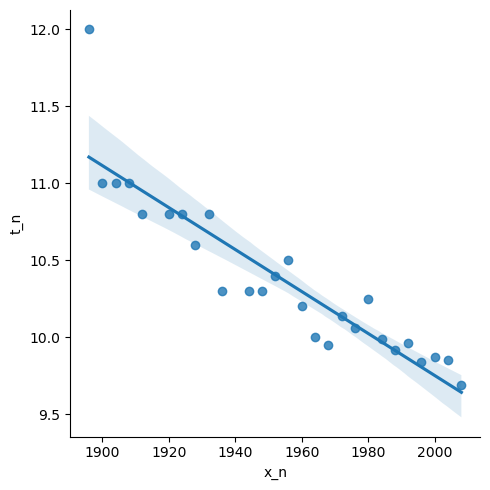

In [45]:
## scatterplot
sns.lmplot(x="x_n", y="t_n", data=data);

In [46]:
#  response variable
y = data['t_n']

#  explanatory variable
x =  data[['x_n']]

# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.OLS(y, x).fit()

# our model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    t_n   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     121.0
Date:                Mon, 22 May 2023   Prob (F-statistic):           4.52e-11
Time:                        11:39:48   Log-Likelihood:                 3.8301
No. Observations:                  27   AIC:                            -3.660
Df Residuals:                      25   BIC:                            -1.069
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.0396      2.424     15.283      0.0

w_1 = -0.0136 and w_0 = 37.0396 hence f(x; w0, w1) = 37.0396 − -0.0136x which is approximate the equation 1.11